In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import rasterio.mask as rmask
import fiona as fio

In [75]:
def read_landsat_images(path):

    files = os.listdir(path)
    bands = [value for value in files if value.endswith('.tif') and 'band' in value]
    other_rasters = [value for value in files if value.endswith('.tif') and 'band' not in value]

    rasters = bands + other_rasters
    
    return {index: os.path.join(path, value) for index, value in enumerate(rasters, start=1)}


path = "LC08/LC081880252013080701T1-SC20191019161406"

rasters_dict = read_landsat_images(path)
rasters_dict

{1: 'LC08/LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_sr_band1.tif',
 2: 'LC08/LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_sr_band2.tif',
 3: 'LC08/LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_sr_band3.tif',
 4: 'LC08/LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_sr_band4.tif',
 5: 'LC08/LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_sr_band5.tif',
 6: 'LC08/LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_sr_band6.tif',
 7: 'LC08/LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_sr_band7.tif',
 8: 'LC08/LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_pixel_qa.tif',
 9: 'LC08/LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_radsat_qa.tif',
 10: 'LC08/LC081880252013080701T1-SC

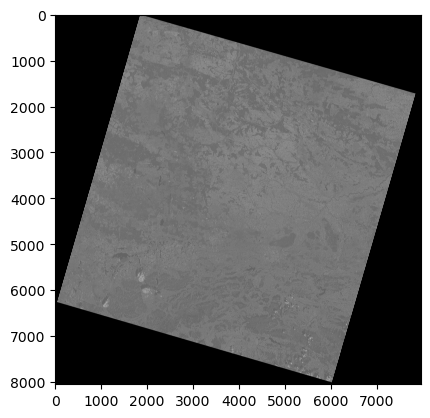

In [76]:
def show_band(band, color_map="gray") -> None:

    with rio.open(band) as src:
        raster = src.read(1)

    plt.imshow(raster, cmap=color_map)
    plt.show()

show_band(rasters_dict[6])


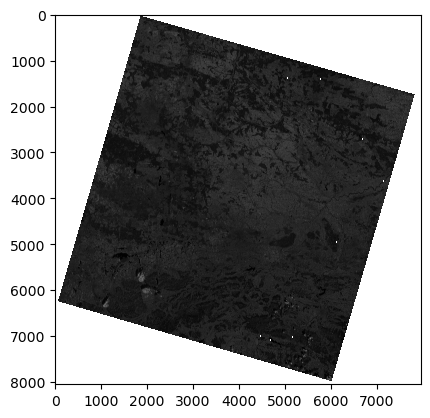

In [77]:
def show_band2(band, color_map="gray", remove_negative=True) -> None:

    with rio.open(band) as src:
        raster = src.read(1)
    
        if remove_negative:
            raster = np.where(raster < 0, np.nan, raster)

    plt.imshow(raster, cmap=color_map)
    plt.show()

show_band2(rasters_dict[6])

In [82]:
def clip_area(vector_file, raster_file, save_image_to):

    with fio.open(vector_file, 'r') as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rio.open(raster_file) as src:
        out_image, out_transform = rio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})
    
    try: 
        with rio.open(save_image_to, "w", **out_meta) as dest:
            dest.write(out_image)
        print(f"Raster zapisany pomyślnie w {save_image_to}")

    except Exception as e:
        print(f"Wystąpił błąd podczas zapisywania rastra: {e}")


clip_area("LC08/krakow_krakowskie.shp", rasters_dict[6], rasters_dict[6].split(".tif")[0] + "_clip.tif")

Raster zapisany pomyślnie w LC08/LC081880252013080701T1-SC20191019161406\LC08_L1TP_188025_20130807_20170503_01_T1_sr_band6_clip.tif.


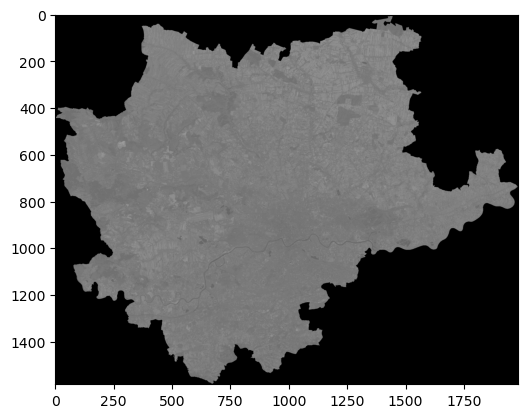

In [84]:
show_band("LC08\\LC081880252013080701T1-SC20191019161406\\LC08_L1TP_188025_20130807_20170503_01_T1_sr_band6_clip.tif")